## Задание 2.1

### Для Функции f(x)

In [ ]:
from scipy.misc import derivative
import math as mth
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
%matplotlib inline

In [ ]:
#Аналитическое решение для f(x)
t = Symbol('t')
print(solve(cos(t)**(2) - (1/(2**(1/2))+1/4)*cos(t) + 1/(4*(2**(1/2))), t))

[0.785398163397450, 1.31811607165282, 4.96506923552677, 5.49778714378214]


In [ ]:
#Инициализируем заданную функцию
def f(x):
    return np.cos(x)**(2) - (1/(2**(1/2))+1/4)*np.cos(x) + 1/(4*(2**(1/2)))

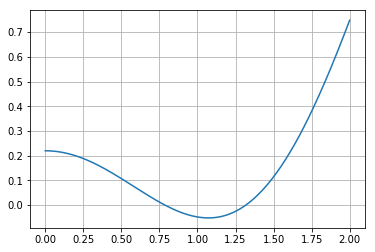

In [ ]:
#Графически локализуем корни f(x)
x = np.linspace(0, 2, 200)
plt.plot(x, f(x))
plt.grid(True)

In [ ]:
#Функция реализующая алгоритм Бисекции с заданной точностью для отрезка [a,b]
def bis(a, b, e, x0):
    while ((b-a)/2)>(e):
        if f(a)*f(x0)<0:
            b = x0
        elif f(b)*f(x0)<0:
            a = x0
        else:
            break
        x0 = (b+a)/2
    return x0

In [ ]:
#Нахождение корней методом бисекции 
a1 = 0
b1 = 1
e1 = 10**(-10)
x01 = (b1+a1)/2
print(bis(a1, b1, e1, x01))


a2 = 1
b2 = 1.5
e2 = 10**(-10)
x02 = (b2+a2)/2
print(bis(a2, b2, e2, x02))

0.7853981634252705
1.3181160716922022


### Для Функции g(x)

In [ ]:
#Аналитическое решение для g(x)
print(solve(cos(t)**(2) - (2/(2**(1/2)))*cos(t) + 1/2, t))

[0.785398163397455 - 8.44990166920631e-8*I, 0.785398163397455 + 8.44990166920631e-8*I, 5.49778714378213 - 8.44990166920647e-8*I, 5.49778714378213 + 8.44990166920647e-8*I]


In [ ]:
#Инициализация функции g(x)
def g(x):
    return np.cos(x)**(2) - (2/(2**(1/2)))*np.cos(x) + 1/2

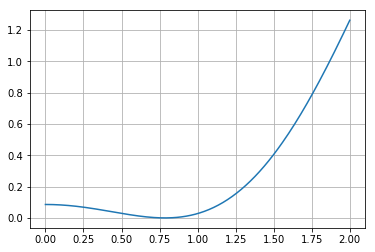

In [ ]:
#Локализируем корни графически
plt.plot(x, g(x))
plt.grid(True)

In [ ]:
#Реализация алгоритма бисекции для g(x)
def bis1(a, b, e, x0):
    while ((b-a)/2)>(e):
        if g(a)*g(x0)<0:
            b = x0
        elif g(b)*g(x0)<0:
            a = x0
        else:
            break
        x0 = (b+a)/2
    return x0

In [ ]:
#Нахождение корней методом бисекции для g(x) 
a3 = 0
b3 = 1.5
e3 = 10**(-10)
x03 = (b3+a3)/2
print(bis1(a3, b3, e3, x03))

0.75


In [ ]:
#Так как корень кратности 2 то его методом бисекции найти нельзя,
#следовательно алоритм выдаст нам просто середину отрезка локализаии.

## Задание 2.2

In [ ]:
#Инициализируем заданую функцию
def f2(x):
    return (x**(1/2)-np.cos(x))

In [ ]:
#Находим ее производную
diff(t**(1/2)-cos(t))

0.5*t**(-0.5) + sin(t)

In [ ]:
#Инициализируем производную
def f22(x):
    return (0.5*x**(-0.5) + np.sin(x))

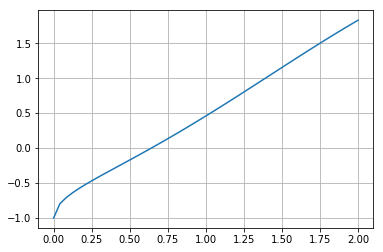

In [ ]:
#Локазируем корни граически, для того чтобы найти отрезок локализации
x1 = np.linspace(0,2)
plt.grid(True)
plt.plot(x1, f2(x1))

In [ ]:
#Реализация алгоритма для метода бисекции
def bis2(a, b, e, x0, f):
    n = 0
    while ((b-a)/2)>(e):
        if f(a)*f(x0)<0:
            b = x0
        elif f(b)*f(x0)<0:
            a = x0
        else:
            break
        x0 = (b+a)/2
        n = n + 1
    return (x0, n)

In [ ]:
#Нахождение корня методом бисекции, на отрезке локализации от a22 до b22
a22 = 0
b22 = 2
x022 = (a22+b22)/2
e22 = 10**(-6)
print(bis2(a22, b22, e22, x022, f2))

(0.6417150497436523, 20)


In [ ]:
#Реализация алгоритма методом бисекции
def newton22(xn, xn1, e, f0, f1):
    n = 0
    while (abs(xn1-xn)>e):
        
        xn = xn1
        
        xn1 = xn - f0(xn)/f1(xn)
        n = n + 1
    return (xn1, n)

In [ ]:
#Нахождение корня методом Ньютона, в каествестве начального приближения середина отрезка [0, 2], т.е. xn22
xn22 = 1
xn122 = xn22 - f2(xn22)/derivative(f2,xn22)
print(newton22(xn22, xn122, e22, f2,f22))

(0.64171437087288263, 3)


In [ ]:
#Метод бисекции сходится линейно со скорстью 1/2
#https://math.semestr.ru/optim/dichotomy.php
#Метод Ньютона сходится квадратично

### Задание 2.3

In [ ]:
#Правая часть в преобраховании функции f(x)=0 к виду х=f1(x)
def g1(x):
    return(np.exp(-x**2))

In [ ]:
#Инициализация f(x)
def cg1(x):
    return(x - np.exp(-x**2))

In [ ]:
#Производная функции f(x)
def g11(x):
    return(2*x*np.exp(-x**2)+1)

In [ ]:
def x(x):
    return(x)

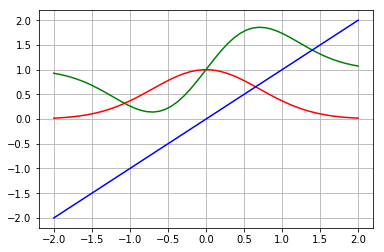

In [ ]:
# Графическое отображение функций y = x, y = g1(x), y = g11(x)
x1 = np.linspace(-2,2)
plt.grid(True)
plt.plot(x1, g1(x1), 'r')
plt.plot(x1, g11(x1), 'g')
plt.plot(x1, x(x1), 'b')

In [ ]:
#Метод итерации для пеобразовния в пункте 2.3.а
def iterac1(xn, xn1, e, q, f, a):
    n = 0
    while(abs(xn-xn1)>(((1-q)*e)/q)):
        xn = xn1
        xn1 =xn1 - a*f(xn1)
        n = n + 1
    return (xn1, n, q)

In [ ]:
#Метод итерации для пеобразовния в пункте 2.3.б
def iterac(xn, xn1, e, q, f):
    n = 0
    while(abs(xn-xn1)>(((1-q)*e)/q)):
        xn = xn1
        xn1 = f(xn1)
        n = n + 1
    return (xn1, n, q)

In [ ]:
#Инициализация параметров для метода простойитерации
x2 = np.linspace(-100, 100)

m = min(g11(x1))
M = max(g11(x1))

xn = 2

e = 10**(-5)
q1 = (M-m)/(m + M)
q2 = max((-2)*x2*np.exp(-x2**2))
a = 2/(M + m)

xn1 = xn -  a*cg1(xn)
xn12 = g1(xn)

print(iterac1(xn, xn1, e, q1, cg1, a))#первое число- корень, вторе - число итераций, третье - параметр q для 2-х разных пунктов
print(iterac(xn, xn12, e, q2, g1))

(0.65291796948090475, 82, 0.85746180025269014)
(0.65286033130448606, 54, 0.063390947591838442)
